## Model Training

##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# Modelling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/Training_data.csv',index_col=0)

### Show Top 5 Records

In [3]:
df.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,True,False,True,False,False,0,Unspecified,Unspecified,Abroad
1,False,True,False,False,False,1,Unspecified,Unspecified,Abroad
2,False,True,False,False,False,1,Unspecified,Unspecified,Abroad
3,True,False,False,False,False,0,Unspecified,Unspecified,Abroad
4,True,False,False,False,False,0,Unspecified,Unspecified,Contact with confirmed


In [4]:
X = df.drop(['Corona','Sex'], axis =1)
y= df['Corona']

In [5]:
# Perfoming LabelEncoding

X[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']] =\
X[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']].apply(LabelEncoder().fit_transform)

In [6]:
# Defining one_hot_encoder : mostly used for nominal variable encoding.
def one_hot_encode_column(data, column_name):
    encoded_column = pd.get_dummies(data[column_name], prefix=column_name, drop_first=True)
    return encoded_column

In [7]:
# Applying One-hot-encoder to all the nominal varible.
encoded_Age_60_above = one_hot_encode_column(X, 'Age_60_above')
encoded_Known_contact = one_hot_encode_column(X, 'Known_contact')

In [8]:
# Concatenating all the encoded variables with the original dataframe.
X = pd.concat([X, encoded_Age_60_above, encoded_Known_contact],axis=1)

In [9]:
X.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Known_contact,Age_60_above_Unspecified,Age_60_above_Yes,Known_contact_Contact with confirmed,Known_contact_Other
0,1,0,1,0,0,Unspecified,Abroad,True,False,False,False
1,0,1,0,0,0,Unspecified,Abroad,True,False,False,False
2,0,1,0,0,0,Unspecified,Abroad,True,False,False,False
3,1,0,0,0,0,Unspecified,Abroad,True,False,False,False
4,1,0,0,0,0,Unspecified,Contact with confirmed,True,False,True,False


In [10]:
# Dropping the previous columns which were encoded.
X.drop([ 'Age_60_above', 'Known_contact', 'Known_contact_Other','Age_60_above_Unspecified'],axis=1,inplace=True)
X.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above_Yes,Known_contact_Contact with confirmed
0,1,0,1,0,0,False,False
1,0,1,0,0,0,False,False
2,0,1,0,0,0,False,False
3,1,0,0,0,0,False,False
4,1,0,0,0,0,False,True


In [11]:
# Mapping the target column
target_mapping = {"positive": 1, "negative": 0}
df['Corona'] = df['Corona'].map(target_mapping)

In [12]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((219761, 7), (54941, 7))

In [13]:
def evaluate_classification_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    cm = confusion_matrix(true, predicted)
    tn, fp, fn, tp = cm.ravel()
    return accuracy, precision, recall, f1, cm, fn

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "SVC": SVC(),
    "Gaussian Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
}

model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []
false_negatives = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    accuracy_train, precision_train, recall_train, f1_train, _, fn_train = evaluate_classification_model(y_train, y_train_pred)
    accuracy_test, precision_test, recall_test, f1_test, cm_test, fn_test = evaluate_classification_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print(f"- Accuracy: {accuracy_train:.4f}")
    print(f"- Precision: {precision_train:.4f}")
    print(f"- Recall: {recall_train:.4f}")
    print(f"- F1 Score: {f1_train:.4f}")

    print('----------------------------------')

    print('Model performance for Test set')
    print(f"- Accuracy: {accuracy_test:.4f}")
    print(f"- Precision: {precision_test:.4f}")
    print(f"- Recall: {recall_test:.4f}")
    print(f"- F1 Score: {f1_test:.4f}")

    print('Confusion Matrix for Test set:')
    print(cm_test)

    print('False Negatives for Test set:', fn_test)

    accuracy_list.append(accuracy_test)
    precision_list.append(precision_test)
    recall_list.append(recall_test)
    f1_list.append(f1_test)
    confusion_matrices.append(cm_test)
    false_negatives.append(fn_test)

    print('='*35)
    print('\n')


Logistic Regression
Model performance for Training set
- Accuracy: 0.9664
- Precision: 0.9641
- Recall: 0.9664
- F1 Score: 0.9650
----------------------------------
Model performance for Test set
- Accuracy: 0.9666
- Precision: 0.9645
- Recall: 0.9666
- F1 Score: 0.9653
Confusion Matrix for Test set:
[[51326   694]
 [ 1142  1779]]
False Negatives for Test set: 1142


Random Forest Classifier
Model performance for Training set
- Accuracy: 0.9677
- Precision: 0.9646
- Recall: 0.9677
- F1 Score: 0.9648
----------------------------------
Model performance for Test set
- Accuracy: 0.9682
- Precision: 0.9652
- Recall: 0.9682
- F1 Score: 0.9655
Confusion Matrix for Test set:
[[51590   430]
 [ 1317  1604]]
False Negatives for Test set: 1317


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9649
- Precision: 0.9616
- Recall: 0.9649
- F1 Score: 0.9625
----------------------------------
Model performance for Test set
- Accuracy: 0.9653
- Precision: 0.9621
- Recall: 0.9653


In [14]:
pd.DataFrame(list(zip(model_list, f1_list)), columns=['Model Name', 'F1_Score']).sort_values(by=["F1_Score"], ascending=False)

,Model Name,F1_Score
5,Gaussian Naive Bayes,0.965749
1,Random Forest Classifier,0.965491
3,Decision Tree Classifier,0.965491
4,SVC,0.965491
7,XGBoost,0.965491
0,Logistic Regression,0.965266
2,K-Neighbors Classifier,0.963019
6,AdaBoost,0.954160


In [15]:
pd.DataFrame(list(zip(model_list, false_negatives)), columns=['Model Name', 'False_Negatives']).sort_values(by=["False_Negatives"])

,Model Name,False_Negatives
5,Gaussian Naive Bayes,1072
0,Logistic Regression,1142
2,K-Neighbors Classifier,1309
1,Random Forest Classifier,1317
3,Decision Tree Classifier,1317
4,SVC,1317
7,XGBoost,1317
6,AdaBoost,1723


### Gaussian NB

In [16]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_score = gnb.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

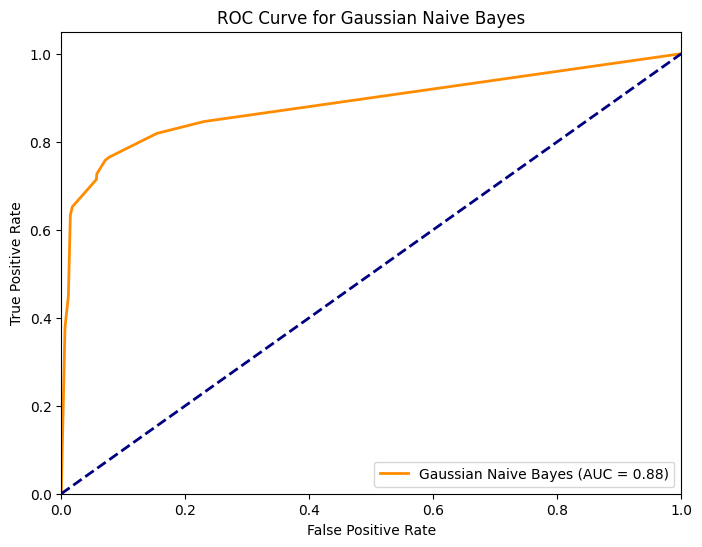

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Gaussian Naive Bayes (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.show()

An AUC value of 0.88 (or 88%) suggests that the model is effective at distinguishing between the two classes, with a high probability of ranking a randomly chosen positive instance higher than a randomly chosen negative instance.